<a href="https://colab.research.google.com/github/Nihal108-bi/Nihal-AI-ML-Practice-Hub/blob/main/Extracting_text_from_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easyocr opencv-python pillow numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 28.7 MB/s eta 0:00:00


**Imports & Setup**

In [ ]:
import cv2
import numpy as np
import easyocr
from typing import Dict, List
import matplotlib.pyplot as plt

img = cv2.imread("/content/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg")
assert img is not None


In [ ]:
reader = easyocr.Reader(['en'], gpu=False)


**Utility Functions**

**Image Loading & Preprocessing**

In [ ]:
# OCR extractor
def extract_text_easyocr(image: np.ndarray) -> List[str]:
    results = reader.readtext(image)
    texts = [res[1] for res in results]
    return texts
#Blur detection
def detect_blur(image: np.ndarray) -> Dict:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()

    return {
        "laplacian_variance": round(lap_var, 2),
        "is_blurry": lap_var < 100
    }

#Brightness analysis
def analyze_brightness(image: np.ndarray) -> Dict:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_val = gray.mean()

    if mean_val < 80:
        lighting = "low"
    elif mean_val > 200:
        lighting = "overexposed"
    else:
        lighting = "normal"

    return {
        "mean_brightness": round(mean_val, 2),
        "lighting_condition": lighting
    }
#Edge density (background clutter signal)
def compute_edge_density(image: np.ndarray) -> Dict:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    density = edges.mean()

    return {
        "edge_density": round(float(density), 4)
    }

#Real image
import matplotlib.pyplot as plt
def Real_image(image_array: np.ndarray):
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)) # Use image_array directly
    plt.title("Loaded Image")
    plt.axis("off")
    plt.show()


**MAIN FUNCTION – Feature Extractor with Real Image**

In [ ]:
def extract_image_features_with_image(image_path: str) -> Dict:
    """
    Input:
        image_path (str): Path to image

    Output:
        Dict containing extracted visual signals
    """

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or invalid path")

    Real_image(image)



    features_with_image = {}

    # OCR
    features_with_image["text_detected"] = extract_text_easyocr(image)

    # Quality signals
    features_with_image["blur_analysis"] = detect_blur(image)
    features_with_image["brightness_analysis"] = analyze_brightness(image)
    features_with_image["edge_analysis"] = compute_edge_density(image)

    return features_with_image ,image


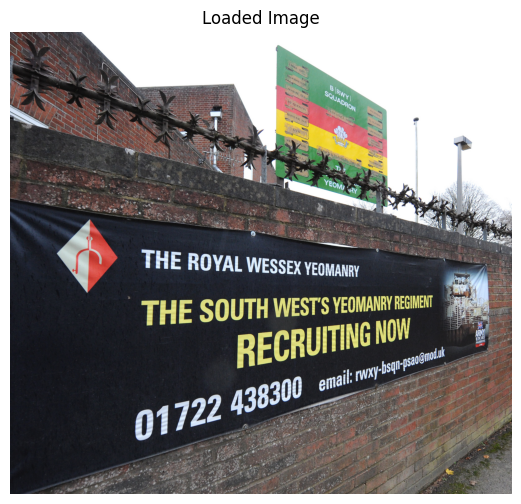

({'text_detected': ['6',
   'THE ROYAL WESSEX YEOMAHRY',
   'THE SOUTH WESTS YEOMAHRYREGHET',
   'NOW',
   'MOodsi INDE',
   'SOMME',
   '(Rwy)',
   'SQUADRON',
   '4916',
   'QUENTIN',
   'XinFFICA',
   'BAPANIE',
   '19,5',
   '41i',
   'DERe',
   '39i ',
   'Yeomi',
   'RECRUITING',
   'NW',
   'E',
   'rwXY-bsqn-pSao@moduk',
   'email:',
   '438300',
   '01722'],
  'blur_analysis': {'laplacian_variance': np.float64(377.83),
   'is_blurry': np.False_},
  'brightness_analysis': {'mean_brightness': np.float64(106.8),
   'lighting_condition': 'normal'},
  'edge_analysis': {'edge_density': 15.2536}},
 array([[[ 56,  54,  54],
         [ 54,  52,  51],
         [ 57,  55,  55],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 59,  57,  57],
         [ 58,  56,  56],
         [ 60,  58,  58],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 61,  59,  59],
         [ 61,  59,  

In [ ]:
image_path = "/content/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg"

features_output = extract_image_features_with_image(image_path)

features_output

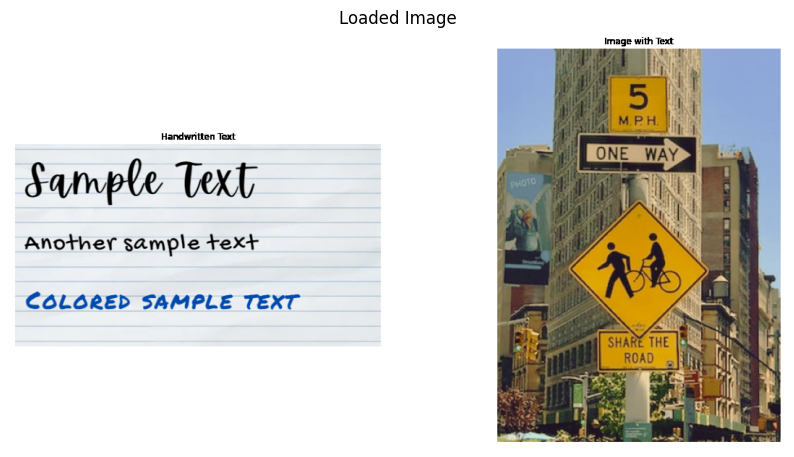

({'text_detected': ['Image',
   'Text',
   '5',
   'MPh',
   'Handwnitten Text',
   'ONE',
   'WAY',
   'Sample Text',
   'Another sample text',
   'colaredSAMPLE',
   'Text',
   'SHARE THE',
   'ROAD',
   'with',
   'pHoto'],
  'blur_analysis': {'laplacian_variance': np.float64(1005.82),
   'is_blurry': np.False_},
  'brightness_analysis': {'mean_brightness': np.float64(198.04),
   'lighting_condition': 'normal'},
  'edge_analysis': {'edge_density': 19.5993}},
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 


In [ ]:
image_path = "/content/download.png"

features_output = extract_image_features_with_image(image_path)

features_output

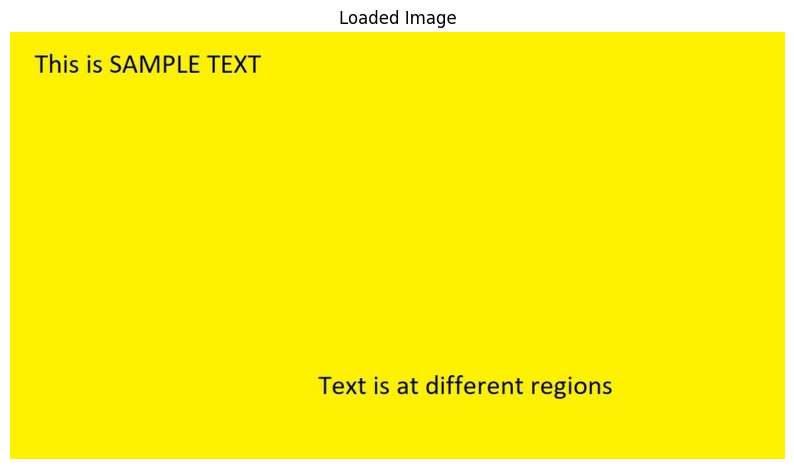

({'text_detected': ['This is SAMPLE TEXT', 'Text is at different regions'],
  'blur_analysis': {'laplacian_variance': np.float64(247.78),
   'is_blurry': np.False_},
  'brightness_analysis': {'mean_brightness': np.float64(216.47),
   'lighting_condition': 'overexposed'},
  'edge_analysis': {'edge_density': 1.4081}},
 array([[[  0, 242, 254],
         [  0, 242, 254],
         [  0, 242, 254],
         ...,
         [  0, 242, 254],
         [  0, 242, 254],
         [  0, 242, 254]],
 
        [[  0, 242, 254],
         [  0, 242, 254],
         [  0, 242, 254],
         ...,
         [  0, 242, 254],
         [  0, 242, 254],
         [  0, 242, 254]],
 
        [[  0, 242, 254],
         [  0, 242, 254],
         [  0, 242, 254],
         ...,
         [  0, 242, 254],
         [  0, 242, 254],
         [  0, 242, 254]],
 
        ...,
 
        [[  0, 242, 254],
         [  0, 242, 254],
         [  0, 242, 254],
         ...,
         [  0, 242, 254],
         [  0, 242, 254],
    

In [ ]:
image_path = "/content/sample.jpg"

features_output = extract_image_features_with_image(image_path)

features_output

## MAIN FUNCTION – Feature Extractor

In [ ]:
def extract_image_features(image_path: str) -> Dict:
    """
    Input:
        image_path (str): Path to image

    Output:
        Dict containing extracted visual signals
    """

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or invalid path")
    features = {}

    # OCR
    features["text_detected"] = extract_text_easyocr(image)

    # Quality signals
    features["blur_analysis"] = detect_blur(image)
    features["brightness_analysis"] = analyze_brightness(image)
    features["edge_analysis"] = compute_edge_density(image)

    return features

# LLM-Based Reasoning (Gemini Flash)


In [ ]:
import json
import time
from google.colab import userdata
import google.generativeai as genai

GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GEMINI_API_KEY)


In [ ]:
model = genai.GenerativeModel("gemini-2.5-flash")

response = model.generate_content("Reply with one word only: OK")
print(response.text)


OK


In [ ]:
import numpy as np

def make_json_safe(obj):
    if isinstance(obj, dict):
        return {k: make_json_safe(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_json_safe(v) for v in obj]
    elif isinstance(obj, (np.bool_, bool)):
        return bool(obj)
    elif isinstance(obj, (np.integer,)):
        return int(obj)
    elif isinstance(obj, (np.floating,)):
        return float(obj)
    elif isinstance(obj, (str, int, float)):
        return obj
    else:
        return str(obj)


In [ ]:
def build_reasoning_prompt(features: dict) -> str:
    return f"""
You are an ML reasoning assistant.
You DO NOT see images. You ONLY reason over structured features.

Return ONLY valid JSON in this exact schema:
{{
  "image_quality_score": 0.0,
  "issues_detected": [],
  "positive_signals": [],
  "final_verdict": "",
  "confidence": 0.0,
  "llm_reasoning_summary": ""
}}

Features (JSON):
{json.dumps(features, indent=2)}
"""


In [ ]:
import json
import re

def extract_json_from_llm(text: str) -> dict:
    """
    Extracts the first JSON object found in LLM output.
    """
    # Remove code fences if present
    text = re.sub(r"```json|```", "", text).strip()

    # Extract JSON object
    match = re.search(r"\{.*\}", text, re.DOTALL)
    if not match:
        raise ValueError("No JSON object found in LLM output")

    return json.loads(match.group())


In [ ]:
def run_llm_reasoning_gemini(features: dict, retries=2, sleep_s=8):
    safe_features = make_json_safe(features)
    prompt = build_reasoning_prompt(safe_features)

    for attempt in range(retries):
        try:
            resp = model.generate_content(prompt)
            text = resp.text.strip()

            return extract_json_from_llm(text)

        except Exception as e:
            if attempt < retries - 1:
                time.sleep(sleep_s * (attempt + 1))
            else:
                return {
                    "error": "Gemini failed or returned invalid JSON",
                    "details": str(e),
                    "raw_response": getattr(resp, "text", None)
                }


In [ ]:
def run_llm_reasoning_gemini(features: dict):
    safe_features = make_json_safe(features)
    prompt = build_reasoning_prompt(safe_features)

    response = model.generate_content(prompt)
    text = response.text.strip()

    return extract_json_from_llm(text)


In [ ]:
image_path = "/content/sample.jpg"  #  image
features = extract_image_features(image_path)

final_output = run_llm_reasoning_gemini(features)
final_output


{'image_quality_score': 0.6,
 'issues_detected': ['Image is overexposed, potentially obscuring details.'],
 'positive_signals': ['Image is not blurry, indicating good focus.',
  'Text content was detected, suggesting reasonable clarity in those regions.'],
 'final_verdict': 'The image has moderate quality. While it benefits from good focus and detectable text, the significant overexposure is a notable drawback affecting overall visual fidelity.',
 'confidence': 0.9,
 'llm_reasoning_summary': "The blur analysis clearly indicates the image is not blurry (laplacian_variance: 247.78, is_blurry: false), which is a strong positive signal for image sharpness. However, the brightness analysis shows the image is overexposed (mean_brightness: 216.47, lighting_condition: 'overexposed'), which is a significant issue as it can lead to washed-out areas and loss of detail. Text was detected, implying that at least some content is clear enough to be read. The edge density is noted but without context 

In [ ]:
image_path = "/content/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg"  # image
features = extract_image_features(image_path)

final_output = run_llm_reasoning_gemini(features)
final_output

{'image_quality_score': 0.95,
 'issues_detected': [],
 'positive_signals': ['Image is sharp and not blurry (laplacian_variance: 377.83).',
  'Lighting condition is normal (mean_brightness: 106.8).',
  'High edge density (15.2536) suggests good detail.',
  "Multiple lines of text are clearly detected, indicating good legibility and content clarity (e.g., 'RECRUITING', 'THE ROYAL WESSEX YEOMANRY', 'email: rwXY-bsqn-pSao@moduk')."],
 'final_verdict': 'The image demonstrates excellent technical quality with no blur, normal lighting, and good detail. The detected text is clear and suggests the image is a well-captured informational or recruitment poster.',
 'confidence': 0.98,
 'llm_reasoning_summary': "The analysis of structured features indicates a high-quality image. The blur analysis shows the image is not blurry with a high Laplacian variance (377.83), signifying excellent sharpness. Brightness is normal (106.8 mean brightness), and edge density is good (15.2536), suggesting sufficient

# Final MarkDown

OCR output is treated as a supporting signal rather than a ground-truth source,
as OCR quality varies significantly with image conditions.


The LLM does not see the image directly.
It reasons only over structured features extracted earlier,
making the system more explainable and controllable.


## Limitations & Future Improvements

- OCR accuracy is sensitive to font style and image quality
- Gemini Flash has strict rate limits on the free tier
- A multimodal vision-language model could further improve reasoning


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("employe_data.csv")
sort_salary=np.sort["salary",descending=True]
second_max=sort_salary[2]

print(second_max)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (ipython-input-4116316304.py, line 4)